Please upload your Train-Set.csv file...


Saving Train-Set.csv to Train-Set (1).csv
Dataset loaded successfully!
Shape of data: (8523, 12)

Missing values before cleaning:
 ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Unique FatContent values after cleaning: ['Low Fat' 'Regular']

===== Summary Insights =====
Highest selling product type: Fruits and Vegetables
Best performing outlet type: Supermarket Type1
Top location type: Tier 3
Top product ID: FDY55
Year with highest sales: 1985


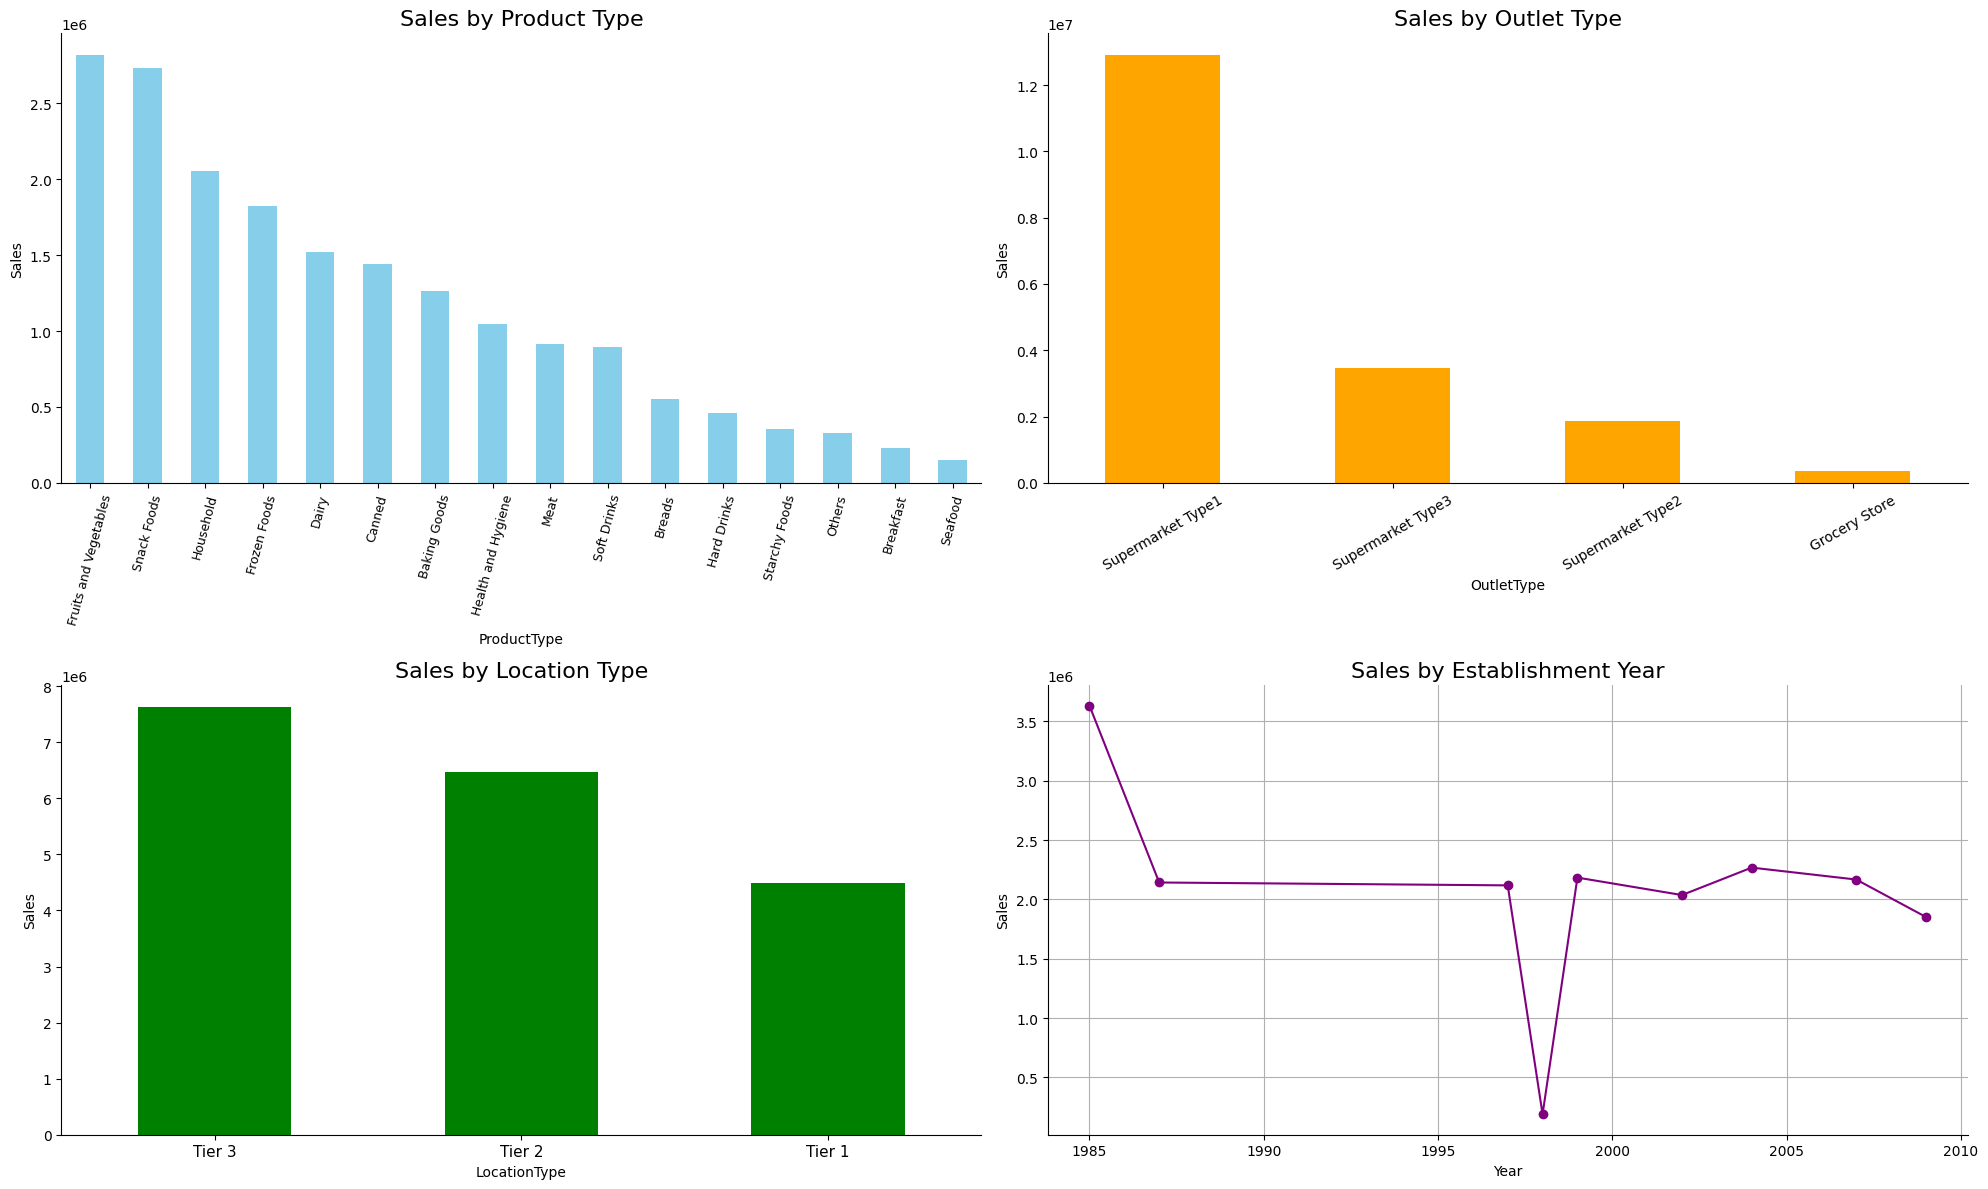

In [1]:
# ===============================
# Sales Data Analysis Project
# Dataset: Train-Set.csv
# ===============================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make plots bigger by default
plt.rcParams['figure.figsize'] = (10,5)


# Step 2: Upload the dataset from local system
from google.colab import files
print("Please upload your Train-Set.csv file...")
uploaded = files.upload()

# Load into dataframe
df = pd.read_csv("Train-Set.csv")
print("Dataset loaded successfully!")
print("Shape of data:", df.shape)
df.head()


# Step 3: Data Cleaning

# Check missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing weight with mean
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

# Fill missing OutletSize with mode (most common)
df['OutletSize'] = df['OutletSize'].fillna(df['OutletSize'].mode()[0])

# Standardize FatContent naming
df['FatContent'] = df['FatContent'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

print("\nUnique FatContent values after cleaning:", df['FatContent'].unique())

# Step 4: Sales by Product Type
product_sales = df.groupby('ProductType')['OutletSales'].sum().sort_values(ascending=False)


# Step 5: Sales by Outlet Type
outlet_sales = df.groupby('OutletType')['OutletSales'].sum().sort_values(ascending=False)


# Step 6: Sales by Location Type
location_sales = df.groupby('LocationType')['OutletSales'].sum().sort_values(ascending=False)


# Step 7: Sales trend by establishment year
year_sales = df.groupby('EstablishmentYear')['OutletSales'].sum()


# Step 8: Top 10 products by sales
top_products = df.groupby('ProductID')['OutletSales'].sum().sort_values(ascending=False).head(10)


print("\n===== Summary Insights =====")
print("Highest selling product type:", product_sales.idxmax())
print("Best performing outlet type:", outlet_sales.idxmax())
print("Top location type:", location_sales.idxmax())
print("Top product ID:", top_products.index[0])
print("Year with highest sales:", year_sales.idxmax())


# ============================
# Final Dashboard
# ============================

import matplotlib.pyplot as plt

# Big figure size for fullscreen view
fig, axes = plt.subplots(2, 2, figsize=(20, 12))   # Bigger than A4 so it fills Colab output

# 1️⃣ Top-left: Sales by Product Type
product_sales.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Sales by Product Type", fontsize=16)
axes[0,0].set_ylabel("Sales")
axes[0,0].tick_params(axis='x', rotation=75, labelsize=9)

# 2️⃣ Top-right: Sales by Outlet Type
outlet_sales.plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title("Sales by Outlet Type", fontsize=16)
axes[0,1].set_ylabel("Sales")
axes[0,1].tick_params(axis='x', rotation=30, labelsize=10)

# 3️⃣ Bottom-left: Sales by Location Type
location_sales.plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title("Sales by Location Type", fontsize=16)
axes[1,0].set_ylabel("Sales")
axes[1,0].tick_params(axis='x', rotation=0, labelsize=11)

# 4️⃣ Bottom-right: Sales by Establishment Year
year_sales.plot(ax=axes[1,1], marker='o', color='purple')
axes[1,1].set_title("Sales by Establishment Year", fontsize=16)
axes[1,1].set_xlabel("Year")
axes[1,1].set_ylabel("Sales")
axes[1,1].grid(True)

# Remove unnecessary chart borders for cleaner look
for ax in axes.flatten():
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

# Tight layout to avoid overlaps
plt.tight_layout()

# Show in fullscreen-like mode
plt.show()

